# Computational Statistics, SS 2021
-------------------------------------------------------------------------------------
## Problem Set  - solutions

### Edoardo Falchi, Wilko Oltmanns and Carolina Álvarez
******************************************************************************






In [1]:
set.seed(321)

### Exercise 1

**Consider the linear regression model:**

$$
y= X\beta + \varepsilon, \quad \text{with} \quad \varepsilon \sim \mathcal{N}_{n}(0, \sigma^2 I)
$$

$ \textstyle X_{1}$ is a constant, $\textstyle X_{2} \sim \mathcal{N}(\mu=0, \sigma^2=1.5)$. The error term is generated as $\varepsilon_{i} \sim \mathcal{N}(0, \sigma^2=10)$. The true Data Generating Process uses as $\beta=(5, -0.5)$ and $N = 1000$.

<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

First of all, let's define some functions that will turn out be useful later on.

In [2]:
#--------------The data generating process (DGP)-------------------------------------------------------
data_generator <- function(N, beta){
  ##
  X   <- cbind(rep(1, N), rnorm(N, 0, sqrt(1.5)))
  ##
  eps  <- rnorm(N, 0, sqrt(10))
  Y    <- X %*% beta + eps
  data <- data.frame("Y"=Y, "X"=X[,2])
  ##
  return(data)
}


#---------------Mean Squared Error Calculator----------------------------------------------------------
mse <- function(lm){
  mean(lm$residuals^2)
}

#----------------Average prediction error Calculator----------------------------------------------------------
a_pred_error <- function(data_test, beta_hat, N){
  
  X <- as.matrix(cbind(rep(1, N), data_test[-1]))
  y_pred <-  X %*% beta_hat
  mean((data_test[,1] - y_pred)^2)
  
}

**a) Generating a training sample $\lbrace(x_{i},y_{i})\rbrace_{i=1}^N $ using the above specification.**

In [3]:
# Setting parameters for the training sample
N <- 1000
beta_true <- c(5, -0.5)
training_sample <- data_generator(N = N, beta = beta_true)
head(training_sample)

Y,X
-0.7760613,2.0880715
1.3708686,-0.8720656
9.6058622,-0.3404606
5.1639138,-0.1465395
11.0866836,-0.1518201
1.3222990,0.3284567


**b) Generate a test sample $\lbrace(x^{\prime}_{i},y^{\prime}_{i})\rbrace_{i=1}^N $**

In [4]:
# Defining the test sample
test_sample <- data_generator(N = N, beta = beta_true)
head(test_sample)

Y,X
2.755092,-1.2442022
6.882837,0.8692187
5.407237,0.7419291
8.934161,1.6934456
1.222592,-1.8001885
4.135590,1.0395220


**c) Calculate the OLS estimate for $\hat{\beta}$**

In [5]:
lm_training <- lm(Y ~ X, data = training_sample)
beta_hat <- coef(lm_training) #storing the estimates for beta
print(beta_hat)

(Intercept)           X 
  5.0497801  -0.5093877 


**d) Calculate the training MSE and the prediction error using the expressions given below for these two individual samples.**

In [6]:
MSE <- mse(lm = lm_training)
print(MSE)

pred_error <- a_pred_error(data_test = test_sample, beta_hat = beta_hat, N = N)
print(pred_error)



[1] 10.25031
[1] 9.781445


**e) Using the training and the test samples from above, calculate the training MSE and the avg. prediction error when sequentially increasing the degree of the polynomial for $X_{2}$ from zero (constant only) to five in the estimation equation (i.e. include $X^2_{2}, X^3_{2}, X^4_{2}, X^5_{2}$ as regressors).**

We would like to estimate the following regressions:

$$
\begin{aligned}
 y &= \beta_1X_{1} + \varepsilon \\
 y &= \beta_1X_{1} + \beta_2X_{2} +\varepsilon \\
 y &= \beta_1X_{1} + \beta_2X_{2} + \beta_3X^2_{2} +\varepsilon \\
 &\vdots\\
 y &= \beta_1X_{1} + \beta_2X_{2} + \beta_3X^2_{2} + \beta_4X^3_{2} + \beta_5X^4_{2} + \beta_6X^5_{2} + \varepsilon
\end{aligned}
$$

In [7]:
X_power_training <- matrix(NaN,N,5) #We want polynomials with degrees up to 5
X_power_test <- matrix(NaN,N,5)

# We take X (second column of the sample) and take it to the power of r. Then we store it. 


for (r in 1:5){
  
  X_power_training[,r] <- training_sample[,2]^r 
  X_power_test[,r] <- test_sample[,2]^r
  
}

# We store the new generated variables together with the realizations of Y in a data frame to 
# fit a linear model and calculate errors (again for both samples). 


data_power_training <- data.frame("Y" = training_sample[,1], X_power_training)
data_power_test <- data.frame("Y" = test_sample[,1], X_power_test)

#----------------------Fitting polynomial models with different degrees------------------------


# We are running 6 linear regression with polynomials up to degree 5, calculating the MSE
# and the average prediction error for each result. 

#Generating vectors to store the results

MSE_result <- c(NaN)
pred_error_result <- c(NaN)

# We are considering the special case with just the constant (degree 0) outside of the loop

l_model <- lm(Y ~ 1, data = data_power_training)

MSE_result[1] <- mse(lm = l_model) 
pred_error_result[1] <- mean((data_power_test[,1] - coef(l_model))^2)


for (r in 1:5){ # r is the maximal degree of the polynomials
  
  l_model <- lm(data_power_training[,1] ~ X_power_training[,1:r])
  MSE_result[r+1] <- mse(lm = l_model)
  pred_error_result[r+1] <- a_pred_error(data_test = data_power_test[,1:(r+1)],
                                         beta_hat = coef(l_model),
                                         N = N)
}  

print(MSE_result)
print(pred_error_result)



[1] 10.63217 10.25031 10.24857 10.24528 10.24361 10.21423
[1] 10.075501  9.781445  9.781147  9.806688  9.795588  9.839813


### Exercise 2

**Using the general set-up from above**

**a) Repeat the simulation 1000 times, each time setting the seed at $100+$ the number of the simulation run.**

In [8]:
num_sim <- 1000  #number of repetitions
result_MSE <- data.frame(c(rep(NaN,6))) #data frames for our results
result_pred <- data.frame(c(rep(NaN,6)))


for (r in 1:num_sim){
  set.seed(100 + r)

  training_sample <- data_generator(N = N, beta = beta_true) #Drawing test and training sample
  test_sample <- data_generator(N = N, beta = beta_true)
  
  #---------------------------------------------------------------
  
  X_power_training <- matrix(NaN,N,5) #Generating new variables
  X_power_test <- matrix(NaN,N,5)
  
  for (i in 1:5){
    X_power_training[,i] <- training_sample[,2]^i 
    X_power_test[,i] <- test_sample[,2]^i
  }
  
  data_power_training <- data.frame("Y" = training_sample[,1], X_power_training) 
  data_power_test <- data.frame("Y"=test_sample[,1], X_power_test)
  
  #---------------------------------------------------------------
  
  #Fitting models for polynomials with different degrees
  
  MSE_result <- c(NaN)
  pred_error_result <- c(NaN)
  
  l_model <- lm(Y ~ 1, data = data_power_training) #special case
  
  MSE_result[1] <- mse(lm = l_model) 
  pred_error_result[1] <- mean((data_power_test[,1] - coef(l_model))^2)
  
  
  for (k in 1:5){ 
    
    l_model <- lm(data_power_training[,1] ~ X_power_training[,1:k])
    MSE_result[k+1] <- mse(lm = l_model)
    pred_error_result[k+1] <- a_pred_error(data_test = data_power_test[,1:(k+1)],
                                           beta_hat = coef(l_model),
                                           N = N)
  }  
  
  result_MSE[r] <- MSE_result #storing the results
  result_pred[r] <- pred_error_result
  
}



**b) Calculate the average training MSE and the average prediction error using the expressions given below and store the results in a vector.**

In [9]:
MSE_mean_sim <- rowMeans(result_MSE)
pred_mean_sim <- rowMeans(result_pred)

print(MSE_mean_sim)
print(pred_mean_sim)

[1] 10.355226  9.969655  9.959822  9.949304  9.938792  9.928603
[1] 10.38791 10.02295 10.03371 10.04561 10.06396 10.10037


**c) Plot the avg. training MSE and the avg. prediction error in one plot and discuss your results. Be sure to complete this simulation for the set-up described in 1 e).**

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

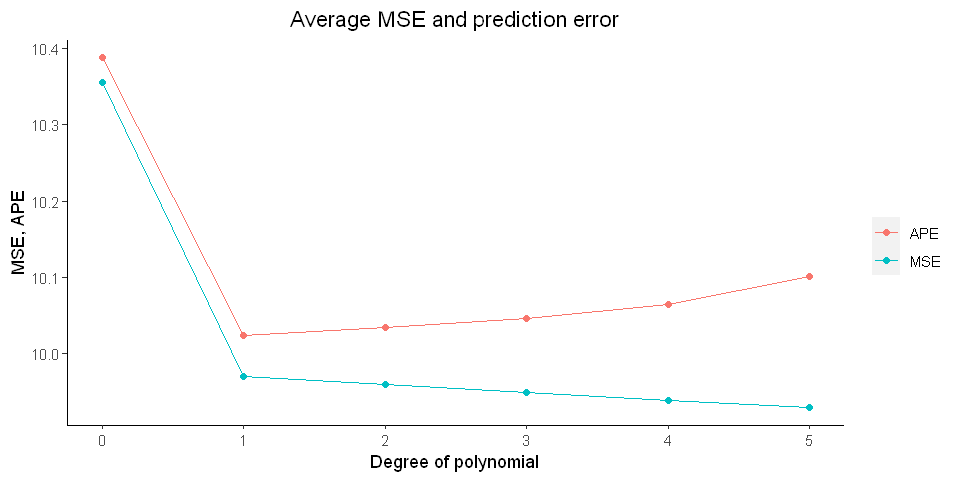

In [10]:
#! install.packages("tidyverse")
library(ggplot2)
library(repr)
# Change plot size to 8 x 4
options(repr.plot.width=8, repr.plot.height=4)

data = data.frame(c(0:5),MSE_mean_sim,pred_mean_sim)

ggplot(data = data, aes()) + 
  geom_point(mapping = aes(x = data[,1] , y = MSE_mean_sim, color = "red" )) +
  geom_point(mapping = aes(x = data[,1],y = pred_mean_sim, color = "blue")) +
  geom_line(mapping = aes(x = data[,1] , y = MSE_mean_sim, color = "red" )) +
  geom_line(mapping = aes(x = data[,1],y = pred_mean_sim, color = "blue")) +
  ggtitle("Average MSE and prediction error") + 
  theme(plot.title = element_text(hjust = 0.5)) +
  xlab("Degree of polynomial") + ylab("MSE, APE") +
  scale_color_discrete(name="", labels = c("APE", "MSE")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))


We saw in our simulation study, that on average the MSE decreases and the APE increases, when we increase the degree of the polynomial (after the constant case). When you increase the degrees, the fit of the model to the training-data-set gets better and better. This is so, because the OLS method minimizes the sum of the squared residuals, which is N*MSE. When we increase the number of parameters, the MSE is at least as high (then the coefficient of this new parameter is equal to zero), or the sum is smaller than before. 

So the MSE is always decreasing, but we don't care so much about the MSE, because to get the smallest MSE we would just set the predicted y-values equal to the observed ones, leading to an MSE equal to zero. Instead we are interested, how good the model is in predicting values, not used to fit the model. This is captured in the average prediction error. When we increase the degree of the polynomials, then the average prediction error gets bigger and bigger, leading (on average) to less and less accurate predictions, because we overfitted the model. 

Therefore, we can conclude, that the MSE is a measure for how close the fit of the model is to the training data, but can't be used to assess the accuracy of the predictions from this model. 

**d) Along which margins could you vary parameters of the initial simulation set-up and what would be your intuition based on the theoretical properties of the considered objects of interest?**

Our data generating process fulfills the all four assumptions from the lecture. Therefore, the OLS-estimator, which is used in the lm_function, is an unbiased estimator. This means, that (on average), our estimation-results are close to the theoretical (true) parameters in the background. In this setting, the OLS estimator is also a consistent estimator. When we would increase the sample size, the accuracy of our prediction would (on average) get better and better, due to the Central Limit Theorem. With N=1000 we have already a quite large sample. This explains, why the estimated coefficients above were close to the coefficients from the data generating process.

In [11]:
cat("training model coefficients \n")
print(coef(lm_training)) 
cat("\n")
cat("True beta \n")
print(beta_true)

training model coefficients 
(Intercept)           X 
  5.0497801  -0.5093877 

True beta 
[1]  5.0 -0.5


An other observation is, that the MSE is roughly equal to 10, which is also the value of the variance of the error term in our data generating process. This is not a coincidence, because with this setup,the MSE is an asymptotically unbiased estimator of the error-variance.

# Reference
* James, G., D. Witten, T. Hastie, and R. Tibshirani (2013). [An introduction to statistical learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7), vol. 112, Springer.

<ins>Training MSE</ins>

$$
\text{MSE} = \frac{1}{n}\sum_{i = 1}^n \big(y_i-\hat{\rho}(\mathbf{x}_i)\big)^2
$$

where $\hat{\rho}(\mathbf{x}_i)$ is the prediction $\hat{\rho}$ gives for the $i$th observation.

<ins>Average prediction error</ins>

$$
\text{Ave} \big(y_i^\prime-\hat{\rho}(\mathbf{x}^\prime_i)\big)^2
$$